In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

df = pd.read_csv('sample_data.csv', index_col = 0)

## Plotting a histogram
- Using pyplot
- Using the object poriented interface

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

(array([2.3635e+04, 1.8230e+03, 1.7800e+02, 2.0000e+01, 1.1000e+01,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.18455674,  4.33888915,  8.49322156, 12.64755397, 16.80188638,
        20.95621879, 25.1105512 , 29.26488361, 33.41921602, 37.57354843,
        41.72788084]),
 <BarContainer object of 10 artists>)

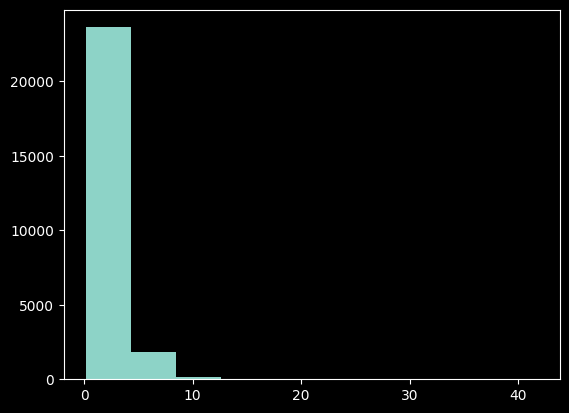

In [11]:
plt.hist(df['integrated_int_DAPI_norm'])

(array([2.3635e+04, 1.8230e+03, 1.7800e+02, 2.0000e+01, 1.1000e+01,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.18455674,  4.33888915,  8.49322156, 12.64755397, 16.80188638,
        20.95621879, 25.1105512 , 29.26488361, 33.41921602, 37.57354843,
        41.72788084]),
 <BarContainer object of 10 artists>)

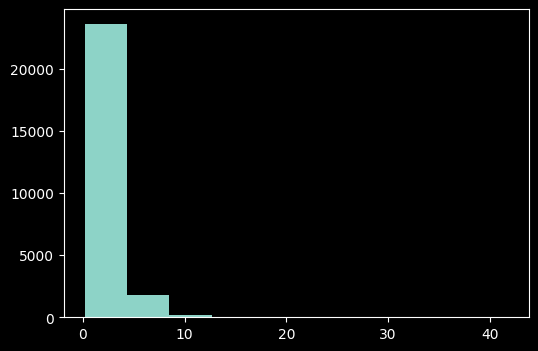

In [12]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(df['integrated_int_DAPI_norm'])



Text(0.5, 1.0, 'Normalised log2 DNA intgerated intensity distribution')

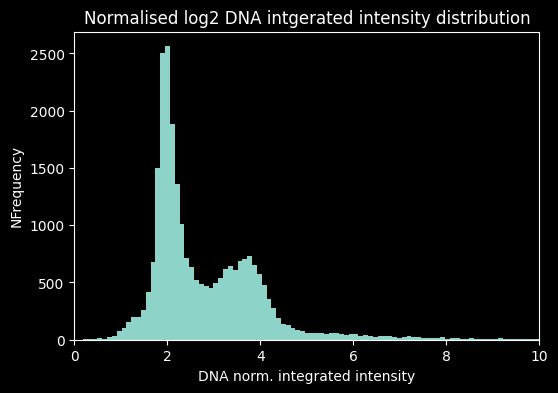

In [15]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(df['integrated_int_DAPI_norm'], bins = 400)
ax.set_xlim([0, 10])
ax.set_xlabel('DNA norm. integrated intensity')
ax.set_ylabel('NFrequency')
ax.set_title('Normalised log2 DNA intgerated intensity distribution')

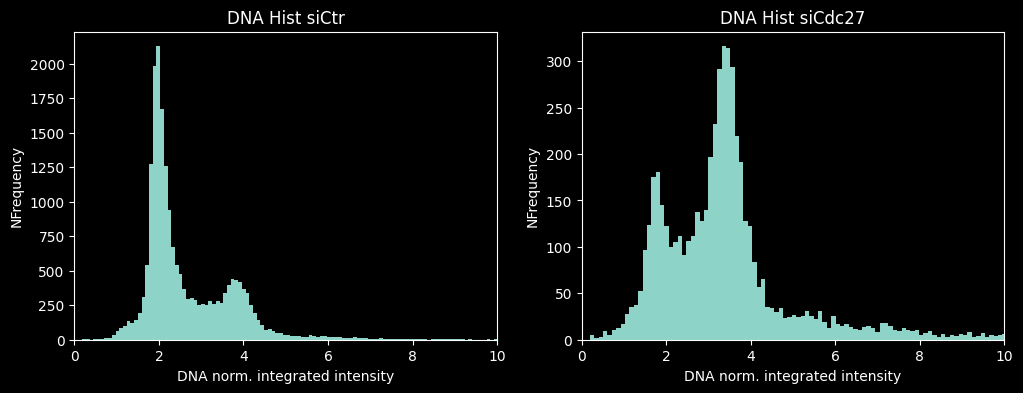

In [17]:
col_number = len(df.condition.unique())
fig, ax = plt.subplots(ncols=col_number, figsize = (6*col_number, 4))
for i, condition in enumerate(df.condition.unique()):
    df_cond = df[df.condition == condition]
    ax[i].hist(df_cond['integrated_int_DAPI_norm'], bins = 400)
    ax[i].set_xlim([0, 10])
    ax[i].set_xlabel('DNA norm. integrated intensity')
    ax[i].set_ylabel('NFrequency')
    ax[i].set_title(f"DNA Hist {condition}")


## matplotlib styles

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

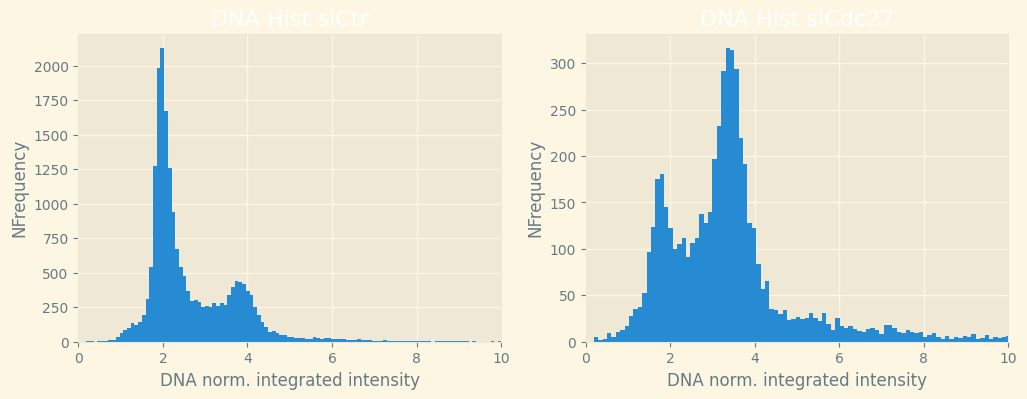

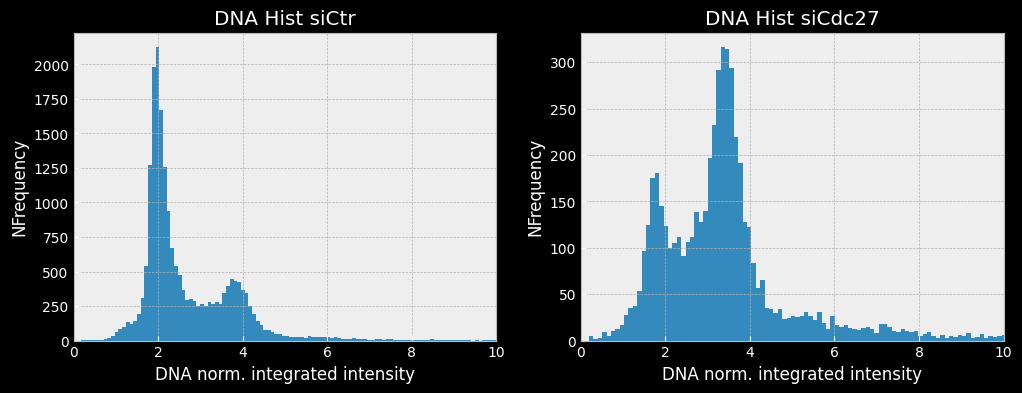

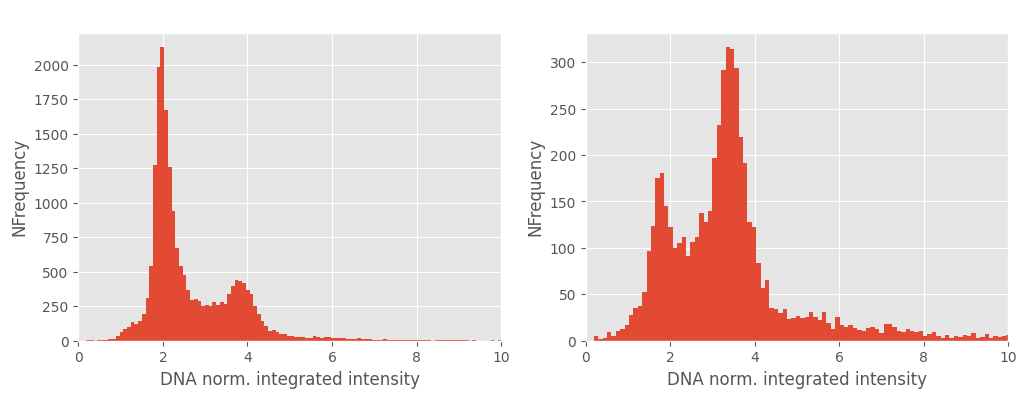

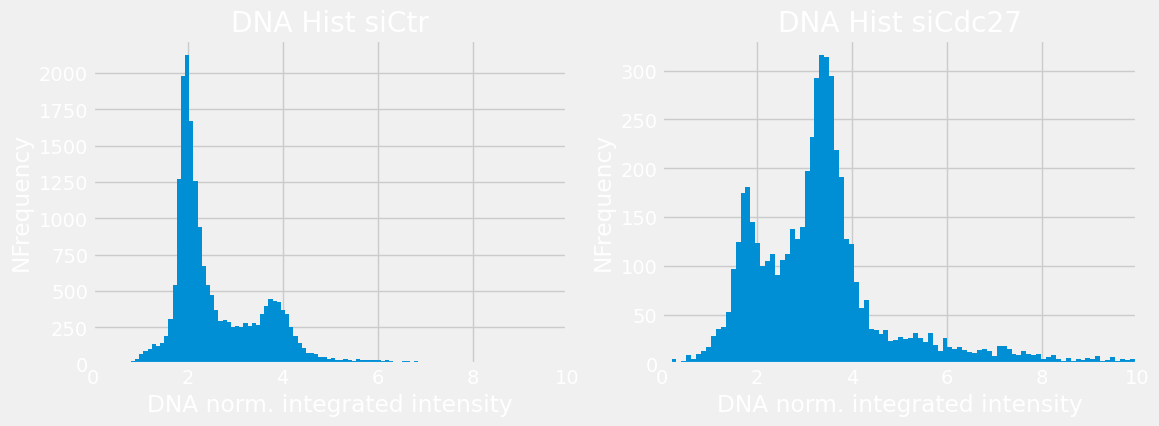

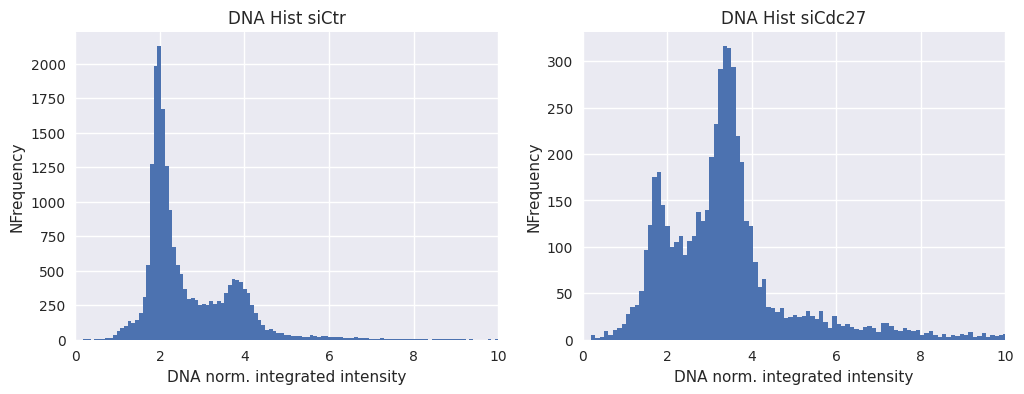

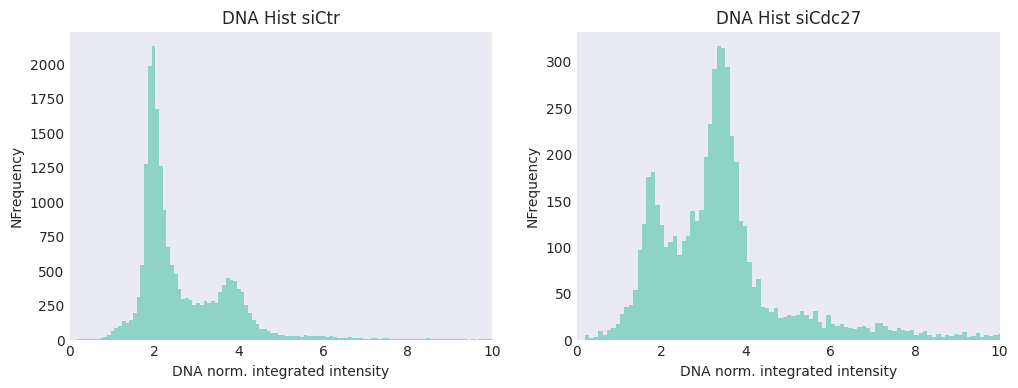

In [20]:
for style in ['Solarize_Light2', 'bmh', 'ggplot', 'fivethirtyeight', 'seaborn-v0_8', 'seaborn-v0_8-dark']:
    with plt.style.context(style):
        col_number = len(df.condition.unique())
        fig, ax = plt.subplots(ncols=col_number, figsize = (6*col_number, 4))
        for i, condition in enumerate(df.condition.unique()):
            df_cond = df[df.condition == condition]
            ax[i].hist(df_cond['integrated_int_DAPI_norm'], bins = 400)
            ax[i].set_xlim([0, 10])
            ax[i].set_xlabel('DNA norm. integrated intensity')
            ax[i].set_ylabel('NFrequency')
            ax[i].set_title(f"DNA Hist {condition}")

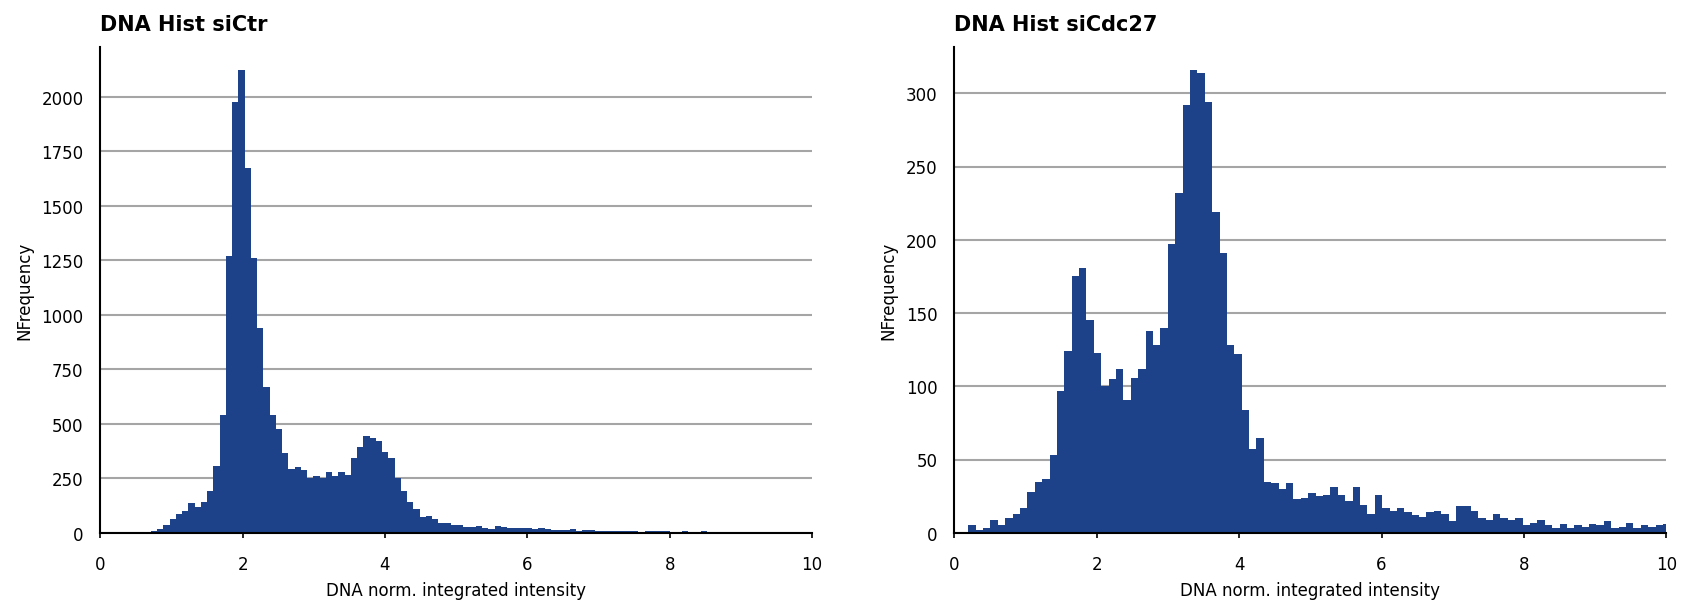

In [21]:
style = "/Users/hh65/Documents/Current_Coding/coding-club/240219_session02/Style_01.mplstyle"
with plt.style.context(style):
    col_number = len(df.condition.unique())
    fig, ax = plt.subplots(ncols=col_number, figsize = (6*col_number, 4))
    for i, condition in enumerate(df.condition.unique()):
        df_cond = df[df.condition == condition]
        ax[i].hist(df_cond['integrated_int_DAPI_norm'], bins = 400)
        ax[i].set_xlim([0, 10])
        ax[i].set_xlabel('DNA norm. integrated intensity')
        ax[i].set_ylabel('NFrequency')
        ax[i].set_title(f"DNA Hist {condition}")

## saving data
matplotlib has a convenient save_fig function to export the figure as png, pdf ect and set the resolution. I use a preset function to help with this: 


In [24]:

def save_fig(fig,
    path: Path, fig_id: str, tight_layout : bool = True, fig_extension: str = "pdf",
        resolution: int = 300) -> None:
    """
    coherent saving of matplotlib figures as pdfs (default)
    :rtype: object
    :param path: path for saving
    :param fig_id: name of saved figure
    :param tight_layout: option, default True
    :param fig_extension: option, default pdf
    :param resolution: option, default 300dpi
    :return: None, saves Figure in poth
    """

    dest = path / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        fig.set_tight_layout(True)
    plt.savefig(dest, format=fig_extension, dpi=resolution, facecolor='white')


Saving figure DNA_hist


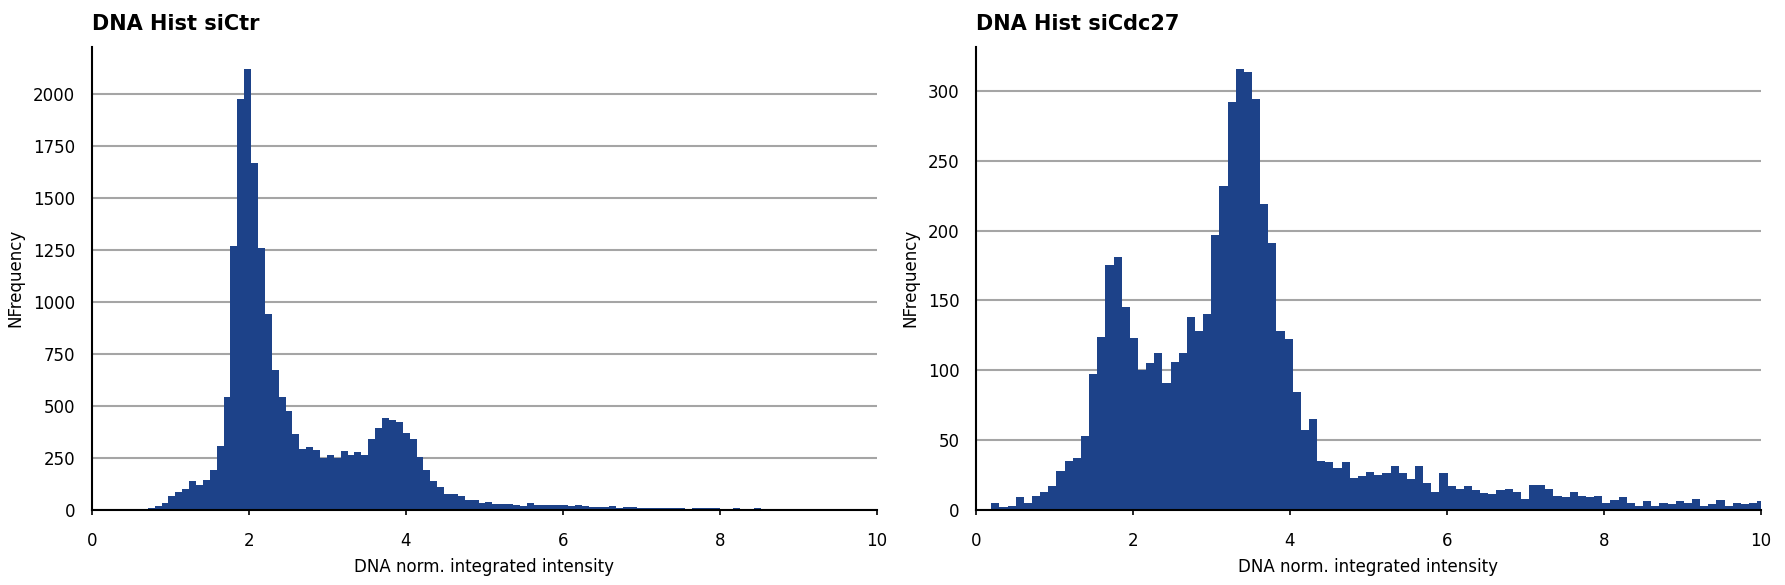

In [26]:
path = Path.cwd() / "data" 
path.mkdir(exist_ok=True)

style = "/Users/hh65/Documents/Current_Coding/coding-club/240219_session02/Style_01.mplstyle"
with plt.style.context(style):
    col_number = len(df.condition.unique())
    fig, ax = plt.subplots(ncols=col_number, figsize = (6*col_number, 4))
    for i, condition in enumerate(df.condition.unique()):
        df_cond = df[df.condition == condition]
        ax[i].hist(df_cond['integrated_int_DAPI_norm'], bins = 400)
        ax[i].set_xlim([0, 10])
        ax[i].set_xlabel('DNA norm. integrated intensity')
        ax[i].set_ylabel('NFrequency')
        ax[i].set_title(f"DNA Hist {condition}")
    save_fig(fig, path, "DNA_hist")

## Excercises
Play around with the different plot types: barplot, violinplot, etc. 
https://matplotlib.org/stable/plot_types/index.html
Try to plot the correlation between integrated intensity and nuclear size using scatter plot.
